In [ ]:
# HOUSE PRICE PEEDITECTION


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset from CSV
df = pd.read_csv("/content/sample_submission.csv")

In [3]:
# Exploratory Data Analysis (EDA)
print(df.head())


     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977


In [4]:
# Summary statistics of the dataset
print(df.describe())

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  179183.918243
std     421.321334   16518.303051
min    1461.000000  135751.318893
25%    1825.500000  168703.011202
50%    2190.000000  179208.665698
75%    2554.500000  186789.409363
max    2919.000000  281643.976117


In [5]:
# Check for missing values
print(df.isnull().sum())

Id           0
SalePrice    0
dtype: int64


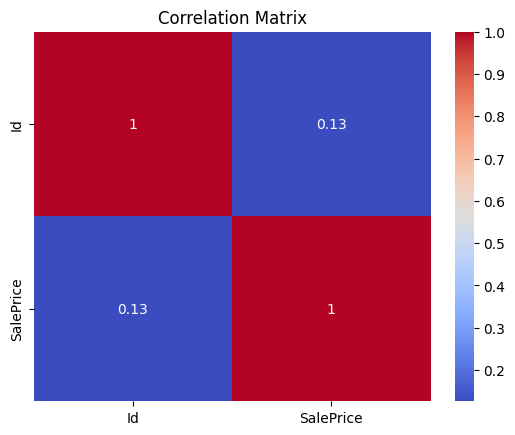

In [6]:
# Correlation matrix to understand feature relationships
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:


df = pd.read_csv('/content/test.csv')
df = pd.read_csv('/content/train (3).csv')
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [15]:
from sklearn.model_selection import train_test_split


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
X = df[["MSSubClass", "MSZoning", "LotFrontage", "LotArea", "Street", "Alley", "LotShape"]]
y = df['SalePrice']  # Assuming 'SalePrice' is your target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
model = LinearRegression()


In [22]:
# Assuming X_train is your training data with categorical variables
# Convert categorical variables into dummy/indicator variables (one-hot encoding)
X_train_encoded = pd.get_dummies(X_train)


#model.fit(X_train_encoded, y_train)



In [27]:
# Fitting the model on the training data
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train_encoded)

# Fitting the model on the imputed training data
model.fit(X_train_imputed, y_train)



LinearRegression()

In [32]:

# Check for missing values in X_test
missing_values = X_test.isnull().sum()
print("Missing values in X_test:\n", missing_values)

# Check for consistency between X_train_encoded and X_test
print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test:", X_test.shape)


Missing values in X_test:
 MSSubClass       0
MSZoning         0
LotFrontage     42
LotArea          0
Street           0
Alley          275
LotShape         0
dtype: int64
Shape of X_train_encoded: (1168, 16)
Shape of X_test: (292, 7)


In [40]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train_encoded)

# Now, X_train_imputed contains the input features with missing values imputed

# Transform the test data using the same imputer
X_test_imputed = imputer.transform(X_test_encoded)



In [41]:
# Making predictions on the imputed test data
y_pred = model.predict(X_test_imputed)


In [43]:
# Assuming you have already made predictions on the test data and stored them in y_pred
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)


In [44]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 5472374430.247594
R-squared: 0.2865525816724773


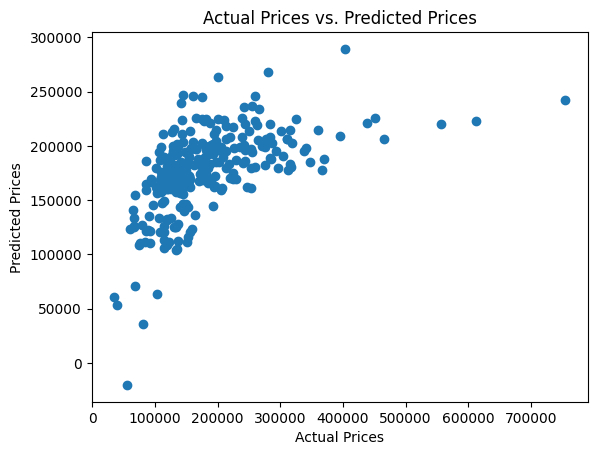

In [45]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

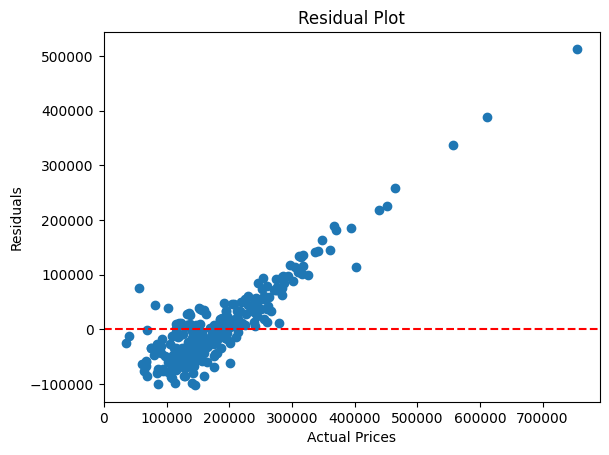

In [46]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()